In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('abalone.csv')

In [4]:
dataframe = pd.DataFrame(data)

In [5]:
dataframe.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


All the features are in correct datatype

Sex : categorical

Rings : integer

remaining : float

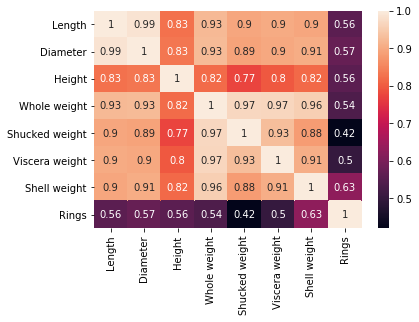

In [7]:
sns.heatmap(dataframe.corr(),annot=True)

#As target variable is rings:
 
 Its highest corr is with Shell weight
 
 And Lowest corr is with Shucked weight
 
 With remaining columns it has good positive corr

In [8]:
dataframe.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Whole weight is showing highest distibution of data

Skewness is present in the data as their is difference between mean and 50 percentile

In [9]:
dataframe.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

NO null values in the dataset

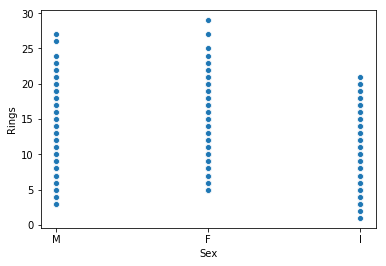

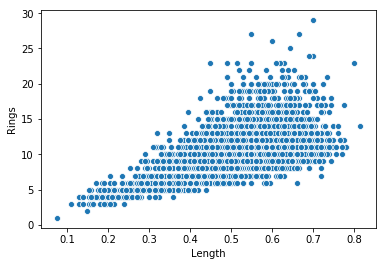

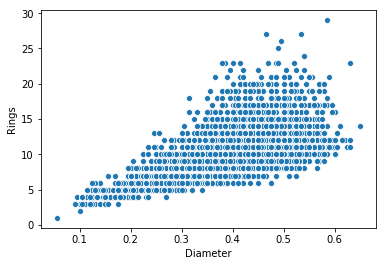

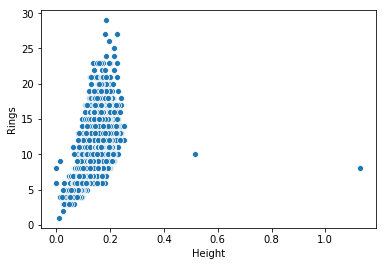

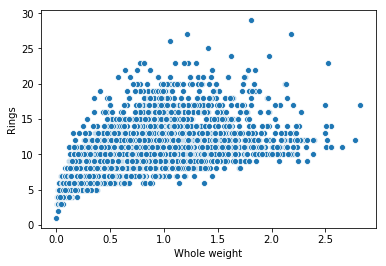

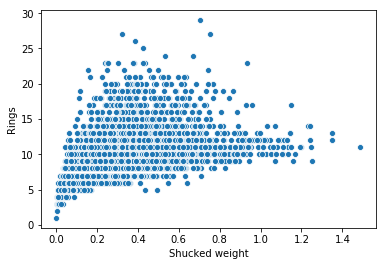

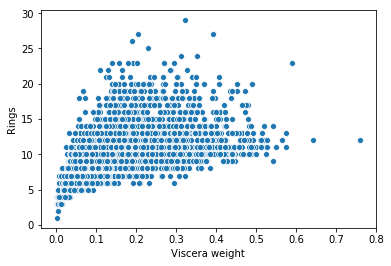

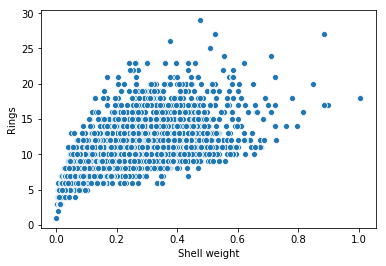

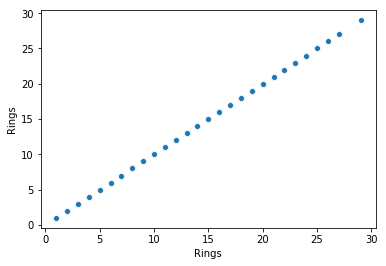

In [10]:
for i in dataframe.columns:
    sns.scatterplot(x=i,y='Rings',data=dataframe)
    plt.show()

Height has least dispersion

Remaining features is distributed upto upper limit and showing positive correlation

In [12]:
numerical_feature = [i for i in dataframe if dataframe[i].dtypes!='O']

Separating numerical features from the dataset to detect outliers ans skewness

In [13]:
numerical_feature

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

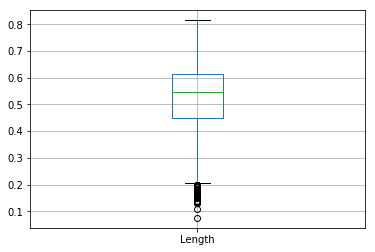

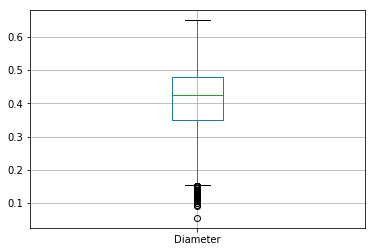

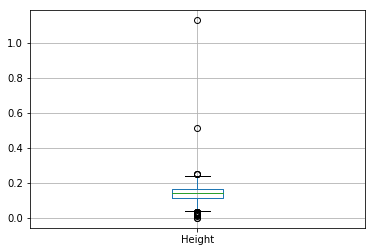

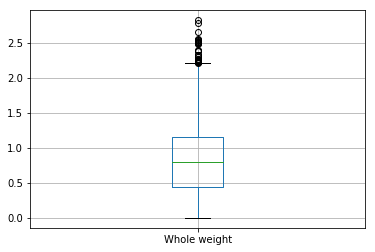

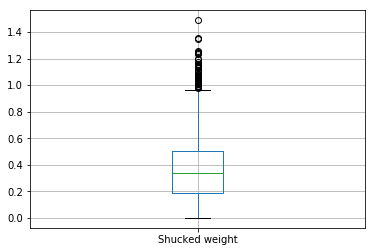

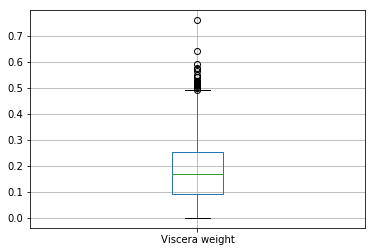

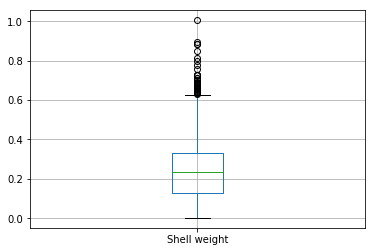

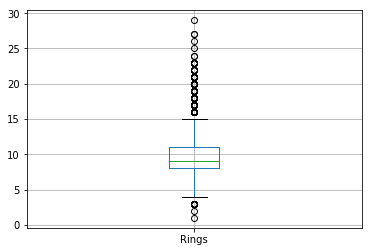

In [15]:
for i in numerical_feature:
    dataframe.boxplot(i)
    plt.show()

Each feature has outliers

Length , Diameter are showing left skewness

Whereas other features are showing right skewness because of outliers

In [16]:
for i in dataframe.columns:
    col = pd.DataFrame(np.where(dataframe[i]==' ',1,0))

In [17]:
col.value_counts()

0    4177
dtype: int64

No blank values in the dataset

In [20]:
df_temp = dataframe.drop('Sex',axis=1)

In [22]:
dataframe['Length'] = np.log(dataframe['Length'])

In [23]:
dataframe['Diameter'] = np.log(dataframe['Diameter'])

In [44]:
dataframe['Whole weight'] = np.log(dataframe['Whole weight'])

In [45]:
dataframe['Shucked weight'] = np.log(dataframe['Shucked weight'])

In [26]:
dataframe['Viscera weight'] = np.log(dataframe['Viscera weight'])

In [27]:
dataframe['Shell weight'] = np.log(dataframe['Shell weight'])

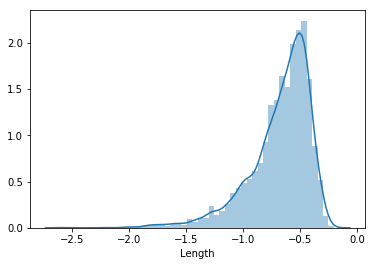

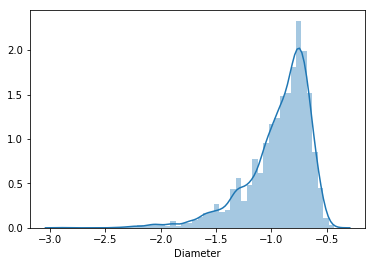

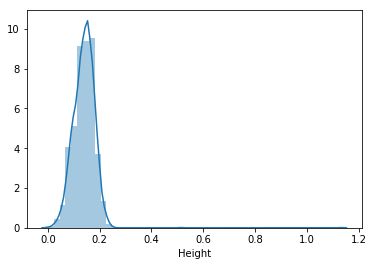

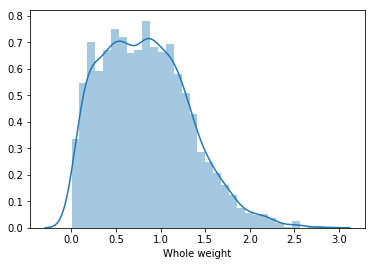

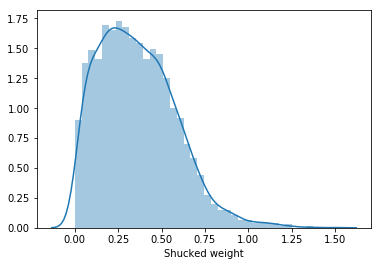

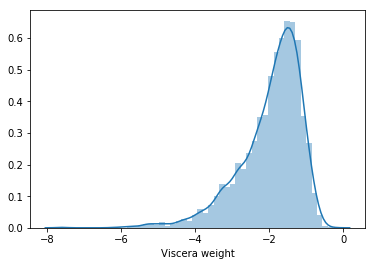

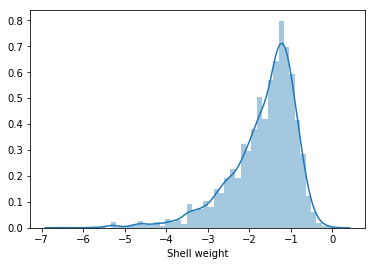

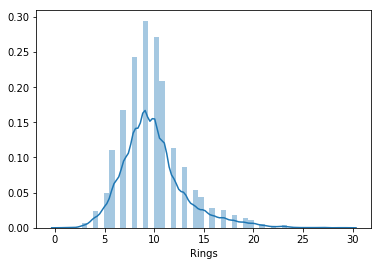

In [29]:
for i in numerical_feature:
    sns.distplot(dataframe[i])
    plt.show()

Skewness is removed after log transform

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataframe['Sex'] = label_encoder.fit_transform(dataframe['Sex'])

In [32]:
dataframe['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

Label encoded Sex column 

Female :1307
    
Infant : 1342
    
Male : 1528
    

In [50]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_sc = pd.DataFrame(min_max.fit_transform(dataframe),columns=dataframe.columns)

In [51]:
df_sc.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.755673,0.766332,0.084071,0.765042,0.741100,0.724533,0.707695,0.500000
1,1.0,0.645699,0.636691,0.079646,0.651452,0.629711,0.624409,0.590574,0.214286
2,0.0,0.819629,0.823165,0.119469,0.803018,0.759341,0.770555,0.759402,0.285714


In [49]:
dataframe.drop(['Wholw weight','Shuked weight'],axis=1,inplace=True)

In [53]:
x = df_sc.drop('Rings',axis=1)

In [54]:
y = df_sc['Rings']

Seperate dependent and target variable

Finding the best random_state for splitting data

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [62]:
rscore = 0.8
msr = 0.3
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr =  LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r_score = r2_score(y_test,pred)
    error = mean_squared_error(y_test,pred)
    print('random_state',i,r_score,error)

random_state 1 0.45718665848575146 0.0068014845209398616
random_state 2 0.5349392259279274 0.006568472347671384
random_state 3 0.4951090283522702 0.006116199924907986
random_state 4 0.5365002246604721 0.005847489961229679
random_state 5 0.5117529844571829 0.006452416276831467
random_state 6 0.5533479718160434 0.006150957546306322
random_state 7 0.5385889911858255 0.006708428826312692
random_state 8 0.5226409992610062 0.006226193704902203
random_state 9 0.5104878013366825 0.006452022070609903
random_state 10 0.5096194459949477 0.0067182939602473575
random_state 11 0.5713972943456265 0.005846577170168074
random_state 12 0.5471824187886284 0.006032643400152329
random_state 13 0.5359429137090206 0.005979809730882104
random_state 14 0.5137392294722025 0.006644372928565813
random_state 15 0.46704160508013504 0.006939595604785452
random_state 16 0.5410513643685785 0.005951158693942426
random_state 17 0.5336752278042113 0.0063002412198674895
random_state 18 0.5350099883019992 0.006494267118035

random state : 11 is giving best r2_score
    
And least mean_squared_error is minimum

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=11)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [67]:
list_algo = [LinearRegression,SVR,DecisionTreeRegressor,KNeighborsRegressor]

In [69]:
for i in list_algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print(i,r2_score(y_test,pred))
    print(mean_squared_error(y_test,pred))
    print('---------')

<class 'sklearn.linear_model._base.LinearRegression'> 0.5713972943456265
0.005846577170168074
---------
<class 'sklearn.svm._classes.SVR'> 0.5483212524962595
0.006161357869576791
---------
<class 'sklearn.tree._classes.DecisionTreeRegressor'> 0.08304939566440017
0.012508139586509006
---------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> 0.5140155016346883
0.006629323230379896
---------


Linear Regression is giving best r2_score

and least error

In [70]:
from sklearn.model_selection import cross_val_score

In [72]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))

0.5713972943456265
0.005846577170168074


In [74]:
for i in range(2,11):
    cross_score = cross_val_score(lr,x,y,cv=i)
    print('cv...',i)
    print(cross_score.mean())
    print('-------')

cv... 2
0.5235559458362218
-------
cv... 3
0.5076554351913022
-------
cv... 4
0.4104744551396763
-------
cv... 5
0.4186579277342065
-------
cv... 6
0.41771652988690255
-------
cv... 7
0.44779633347827535
-------
cv... 8
0.36824972135542333
-------
cv... 9
0.42351107612584343
-------
cv... 10
0.35052237807595
-------


Model is not working well with cross validation

In [76]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lr,step=1)
rfe = rfe.fit(x_train,y_train)
selected_feature = pd.DataFrame({'features':list(x_train.columns),'ranking':rfe.ranking_})

In [77]:
selected_feature

,features,ranking
0,Sex,5
1,Length,1
2,Diameter,4
3,Height,3
4,Whole weight,1
5,Shucked weight,1
6,Viscera weight,2
7,Shell weight,1


Sex is least significant feature 

Length , Whole weight , Shucked weight , Shell weight : most significant features

In [78]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)
rfe_model = lr.fit(x_train_rfe,y_train)

In [79]:
 p = rfe_model.predict(x_test_rfe)

In [81]:
mean_squared_error(p,y_test)

0.005947081198348438

In [82]:
x_train_rfe

array([[0.77370444, 0.75830894, 0.73739182, 0.70354174],
       [0.85012711, 0.88020027, 0.84340159, 0.85054095],
       [0.80759475, 0.80322134, 0.79832063, 0.67211799],
       ...,
       [0.5446129 , 0.53371631, 0.49429499, 0.46036644],
       [0.85741711, 0.83069325, 0.79004688, 0.78277744],
       [0.89539208, 0.89185178, 0.8742936 , 0.83569191]])

Not making impact by RFE

In [83]:
svr = SVR()
svr.fit(x_train,y_train)
pred = svr.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
for i in range(2,11):
    cross_score = cross_val_score(svr,x,y,cv=i)
    print('cv...',i)
    print(cross_score.mean())
    print('-------')

0.5483212524962595
0.006161357869576791
cv... 2
0.5213103237890546
-------
cv... 3
0.5062608453388658
-------
cv... 4
0.41399678748037905
-------
cv... 5
0.39020279846280814
-------
cv... 6
0.40224561183762386
-------
cv... 7
0.43505353737187946
-------
cv... 8
0.3604004705480907
-------
cv... 9
0.3948016981982515
-------
cv... 10
0.31656947659470724
-------


Showing Almost results as Linear Regression model

In [84]:
k_n = KNeighborsRegressor()
k_n.fit(x_train,y_train)
pred = k_n.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))

0.5140155016346883
0.006629323230379896


In [85]:
for i in range(2,11):
    cross_score = cross_val_score(svr,x,y,cv=i)
    print('cv...',i)
    print(cross_score.mean())
    print('-------')

cv... 2
0.5213103237890546
-------
cv... 3
0.5062608453388658
-------
cv... 4
0.41399678748037905
-------
cv... 5
0.39020279846280814
-------
cv... 6
0.40224561183762386
-------
cv... 7
0.43505353737187946
-------
cv... 8
0.3604004705480907
-------
cv... 9
0.3948016981982515
-------
cv... 10
0.31656947659470724
-------


Trying ensemble technique to improve the performance of the model

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(r2_score(y_test,pred_rf))
print(mean_squared_error(y_test,pred_rf))

0.562476778427326
0.005968262087285965


Random forest giving best result than the previous ones

In [90]:
from sklearn.ensemble import AdaBoostRegressor

In [93]:
ab = AdaBoostRegressor(n_estimators=100,base_estimator=lr)
ab.fit(x_train,y_train)
pred_ab = ab.predict(x_test)
print(r2_score(y_test,pred_ab))
print(mean_squared_error(y_test,pred_ab))

0.4847945811465938
0.007027926329154446


Random forest classifier is best model :
    
Saving the model

In [95]:
import pickle
abalone_file = 'pickl.pkl'
pickle.dump(rf,open(abalone_file,'wb'))

Conclusion

In [96]:
original_res = np.array(y_test)
pred_res = np.array(rf.predict(x_test))
df_comparison = pd.DataFrame({'original':pred_res,'predicted':pred_res})
df_comparison

,original,predicted
0,0.353929,0.353929
1,0.272857,0.272857
2,0.269643,0.269643
3,0.140000,0.140000
4,0.278929,0.278929
...,...,...
1374,0.222857,0.222857
1375,0.133571,0.133571
1376,0.342857,0.342857
1377,0.321429,0.321429
